In [1]:
import time
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import train_test_split, GridSearchCV, HalvingGridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data", header = None)
df.columns = np.array(['quality', 'alcohol', 'malic_acid', 'ash', 'alkalinity_of_ash', 'magnesium', 'total_phenols', 
                 'flavanoids', 'non_flavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 
                 'OD280/OD315_of_diluted_wines', 'proline'])

<Axes: >

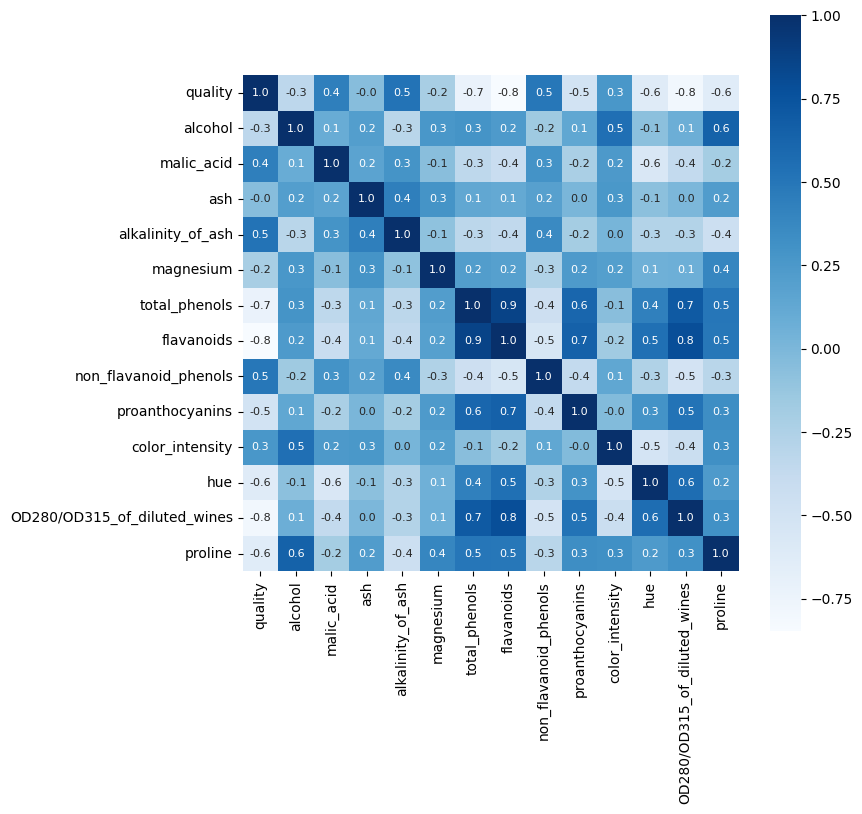

In [3]:
plt.figure(figsize=(8, 8))

sns.heatmap(df.corr(), cbar=True, square=True, fmt = '.1f', annot = True, annot_kws={'size':8}, cmap = 'Blues')
#No need to oversample as there are no imbalances

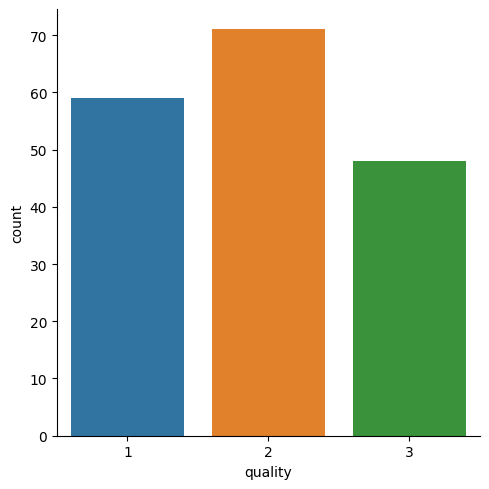

In [4]:
sns.catplot(x = 'quality', data = df, kind = 'count')

In [5]:
# Separating features from the labels
data = df.drop("quality", axis = 1)
target = df["quality"]

In [6]:
scaler = StandardScaler()
scaler.fit_transform(data)

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    data, target, stratify = target, random_state = 49, test_size = 0.25)

# Decision Tree Implementation

In [8]:
from sklearn.tree import DecisionTreeClassifier

In [51]:
dtree = DecisionTreeClassifier()

# Finding a decision tree based on default parameters set in scikit-learn
dtree.fit(X_train, y_train) 

DecisionTreeClassifier()

In [52]:
print('Accuracy score for Decision Tree Classifier using default parameters : ', dtree.score(X_test, y_test))

Accuracy score for Decision Tree Classifier using default parameters :  0.9333333333333333


In [62]:
t1 = time.time()
gs_dtree = GridSearchCV(DecisionTreeClassifier(), {
    'criterion' : ['gini', 'entropy'], 
    'min_samples_split' : [2, 3, 5, 7, 10],
    'min_samples_leaf' : [1, 2, 5, 7]
}, cv = 4, n_jobs = -1)
gs_dtree.fit(X_train, y_train)
print(time.time() - t1)

1.6368052959442139


In [54]:
print('Best paramter for Decision Tree Classifier : ', gs_dtree.best_params_)
print('Accuracy score for Decision Tree Classifier using above parameters : ', gs_dtree.score(X_test, y_test))

Best paramter for Decision Tree Classifier :  {'criterion': 'entropy', 'min_samples_leaf': 1, 'min_samples_split': 3}
Accuracy score for Decision Tree Classifier using above parameters :  0.9333333333333333


# Random Forest Implementation

In [13]:
from sklearn.ensemble import RandomForestClassifier

In [14]:
rf = RandomForestClassifier(random_state = 49)
rf.fit(X_train, y_train)

RandomForestClassifier()

In [15]:
print('Accuracy score for Random Forest Classifier using default parameters : ', rf.score(X_test, y_test))

Accuracy score for Random Forest Classifier using default parameters :  0.9777777777777777


In [16]:
t2 = time.time()
gs_rf = GridSearchCV(RandomForestClassifier(), {
    'random_state' : [49],
    'n_estimators' : [10, 15, 20, 30, ],
    'criterion' : ['gini', 'entropy'],
    'min_samples_split' : [2, 3, 5, 7, 10],
    'min_samples_leaf' : [1, 2, 5, 7]
}, cv = 4, n_jobs = -1)
gs_rf.fit(X_train, y_train)
print(time.time() - t2)

5.567207336425781


In [17]:
print('Best paramter for Random Forest Classifier : ', gs_rf.best_params_)
print('Accuracy score for Random Forest Classifier using above parameters : ', gs_rf.score(X_test, y_test))

Best paramter for Random Forest Classifier :  {'criterion': 'gini', 'min_samples_leaf': 1, 'min_samples_split': 7, 'n_estimators': 15}
Accuracy score for Random Forest Classifier using above parameters :  0.9777777777777777


# Naive Bayes Implementation

In [18]:
from sklearn.naive_bayes import GaussianNB

In [19]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [20]:
print('Accuracy score for Gaussian Naive Bayes Classifier using default parameters : ', gnb.score(X_test, y_test))

Accuracy score for Gaussian Naive Bayes Classifier using default parameters :  0.9777777777777777


In [30]:
#There isn't much parameter tuning that can be done in Gaussian Naive Bayes

# KNN Implementation

In [21]:
from sklearn.neighbors import KNeighborsClassifier

In [22]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [23]:
print('Accuracy score for KNeighboutClassifier using default parameters : ', knn.score(X_test, y_test))

Accuracy score for KNeighboutClassifier using default parameters :  0.7333333333333333


In [24]:
t3 = time.time()
gs_knn = GridSearchCV(KNeighborsClassifier(), {
    'n_neighbors' : [2, 3, 4, 5, 6, 7, 8, 9, 10],
    'p' : [1, 2, 3]
}, cv = 4)
gs_knn.fit(data, target)
print(time.time() - t3)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'p': [1, 2, 3]})

In [25]:
print('Best paramter for KNeighboutClassifier : ', gs_knn.best_params_)
print('Accuracy score for KNeighboutClassifier using above parameters : ', gs_knn.score(X_test, y_test))

Best paramter for KNeighboutClassifier :  {'n_neighbors': 9, 'p': 1}
Accuracy score for KNeighboutClassifier using above parameters :  0.9333333333333333


# SVM Implementation

In [26]:
from sklearn import svm

In [27]:
sv = svm.SVC()
sv.fit(X_train, y_train)
print('Accuracy score for Support Vector Classifier using default parameters : ', sv.score(X_test, y_test))

Accuracy score for Support Vector Classifier using default parameters :  0.6666666666666666


In [28]:
t4 = time.time()
gs_sv = GridSearchCV(svm.SVC(), {
    'kernel' : ['linear', 'poly', 'rbf'], 
    'gamma' : [0.0001, 0.001, 0.01, 0.1, 1, 10, 100], 
    'C' : [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
}, cv = 4, n_jobs = -1,)
gs_sv.fit(X_train, y_train)
print(time.time() - t4)

3.2599806785583496


In [29]:
print('Best paramter for Support Vector Classifier : ', gs_sv.best_params_)
print('Accuracy score for Support Vector Classifier using above parameters : ', gs_sv.score(X_test, y_test))

Best paramter for Support Vector Classifier :  {'C': 0.001, 'gamma': 0.001, 'kernel': 'poly'}
Accuracy score for Support Vector Classifier using above parameters :  0.9777777777777777


# Neural Network Implementation

In [43]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(max_iter = 1000)
mlp.fit(X_train, y_train)

MLPClassifier(max_iter=1000)

In [44]:
print('Accuracy score for Support Vector Classifier using default parameters : ', mlp.score(X_test, y_test))

Accuracy score for Support Vector Classifier using default parameters :  0.8


In [63]:
t5 = time.time()
gs_mlp = GridSearchCV(MLPClassifier(max_iter = 1000), {
    'activation' : ['identity', 'logistic', 'relu', 'tanh'],
    'solver' : ['lbfgs', 'sgd', 'adam'],
    'alpha' : [0.0001, 0.001, 0.01],
    'learning_rate' : ['constant', 'invscaling', 'adaptive']
}, cv = 4, n_jobs = -1)
gs_mlp.fit(X_train, y_train)
print(time.time()- t5)

67.37685656547546


In [64]:
print('Best paramter for MLP Classifier : ', gs_mlp.best_params_)
print('Accuracy score for MLP Classifier using above parameters : ', gs_mlp.score(X_test, y_test))

Best paramter for MLP Classifier :  {'activation': 'logistic', 'alpha': 0.0001, 'learning_rate': 'adaptive', 'solver': 'adam'}
Accuracy score for MLP Classifier using above parameters :  0.9333333333333333
